In [16]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [17]:
df=pd.read_csv('/content/AAPL.csv')

In [18]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [19]:
df.shape

(1258, 15)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.6+ KB


In [21]:
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [22]:
df.isna().sum()

,0
Unnamed: 0,0
symbol,0
date,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0


In [23]:
df1=df.reset_index()['close']

In [24]:
df1.shape

(1258,)

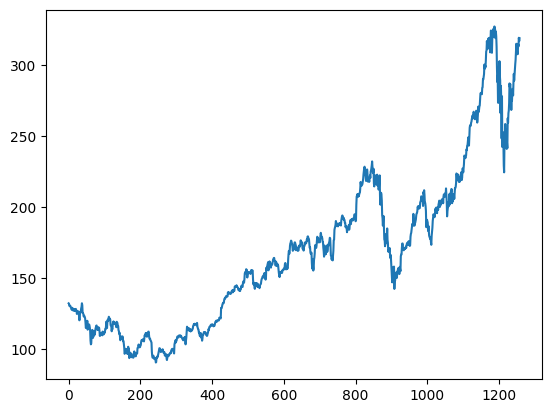

In [25]:
import matplotlib.pyplot as plt
plt.plot(df1)

Applying minmax scaler

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [28]:
#splitting of data into train and test
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(817, 441)

In [30]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [32]:
#convert array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [33]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)


In [34]:
X_train.shape,y_train.shape

((716, 100), (716,))

In [35]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])